In [1]:
import pandas as pd
import glob
import os

data_directory = ''

activity_dataframes = {}

for activity in ['idle', 'running', 'stairs', 'walking']:
    activity_folder_path = os.path.join(data_directory, activity)
    csv_pattern = os.path.join(activity_folder_path, '*.csv')
    csv_files = glob.glob(csv_pattern)
    activity_df = pd.concat([pd.read_csv(f) for f in csv_files])
    activity_dataframes[activity] = activity_df

activity_dataframes['idle'].head()


,accelerometer_X,accelerometer_Y,accelerometer_Z
0,0.009577,5.937620,7.570466
1,0.086191,6.555324,7.785944
2,0.004788,6.440403,7.139510
3,0.277727,6.430826,7.690176
4,-0.047884,6.239290,7.340623


Data was loaded from folders

In [2]:
def preprocess_and_engineer_features(df, window_size=100):
    df_cleaned = df.dropna()

    # Feature Engineering: Segmenting the data into windows and calculating statistical features
    # Calculating the mean, standard deviation, min, and max for each window
    features = df_cleaned.rolling(window=window_size).agg(['mean', 'std', 'min', 'max'])
    features = features.dropna()

    return features

# Applying the preprocessing to each activity's DataFrame
processed_activity_data = {activity: preprocess_and_engineer_features(df)
                           for activity, df in activity_dataframes.items()}

processed_activity_data['idle'].head()


accelerometer_X                               accelerometer_Y            \
              mean       std       min       max            mean       std   
9         0.057269  0.318854 -0.885855  0.828394        3.862757  3.227507   
10        0.059807  0.319480 -0.885855  0.828394        3.802471  3.244618   
11        0.061818  0.320280 -0.885855  0.828394        3.736200  3.255485   
12        0.063494  0.320417 -0.885855  0.828394        3.670694  3.266408   
13        0.063159  0.320208 -0.885855  0.828394        3.605572  3.275727   

                       accelerometer_Z                                
         min       max            mean       std       min       max  
9  -0.828394  7.465121        8.257362  1.293448  6.042965  9.811439  
10 -0.828394  7.465121        8.279102  1.300039  6.042965  9.811439  
11 -0.828394  7.465121        8.299117  1.307755  6.042965  9.811439  
12 -0.828394  7.465121        8.325214  1.310417  6.042965  9.811439  
13 -0.828394  7.465121        8.345756  1.316448  6.042965  9.811439

Missing values were dropped from the data. This ensures that only complete data points are used for feature engineering.

Feature Engineering:
The data was segmented into windows. Each window consists of 100 consecutive data points. 
For each window, statistical features were calculated for the accelerometer_X, accelerometer_Y, and accelerometer_Z columns. The features include the mean, standard deviation, minimum, and maximum of the accelerometer readings within each window. These features help to capture the characteristics of the movement within each window.

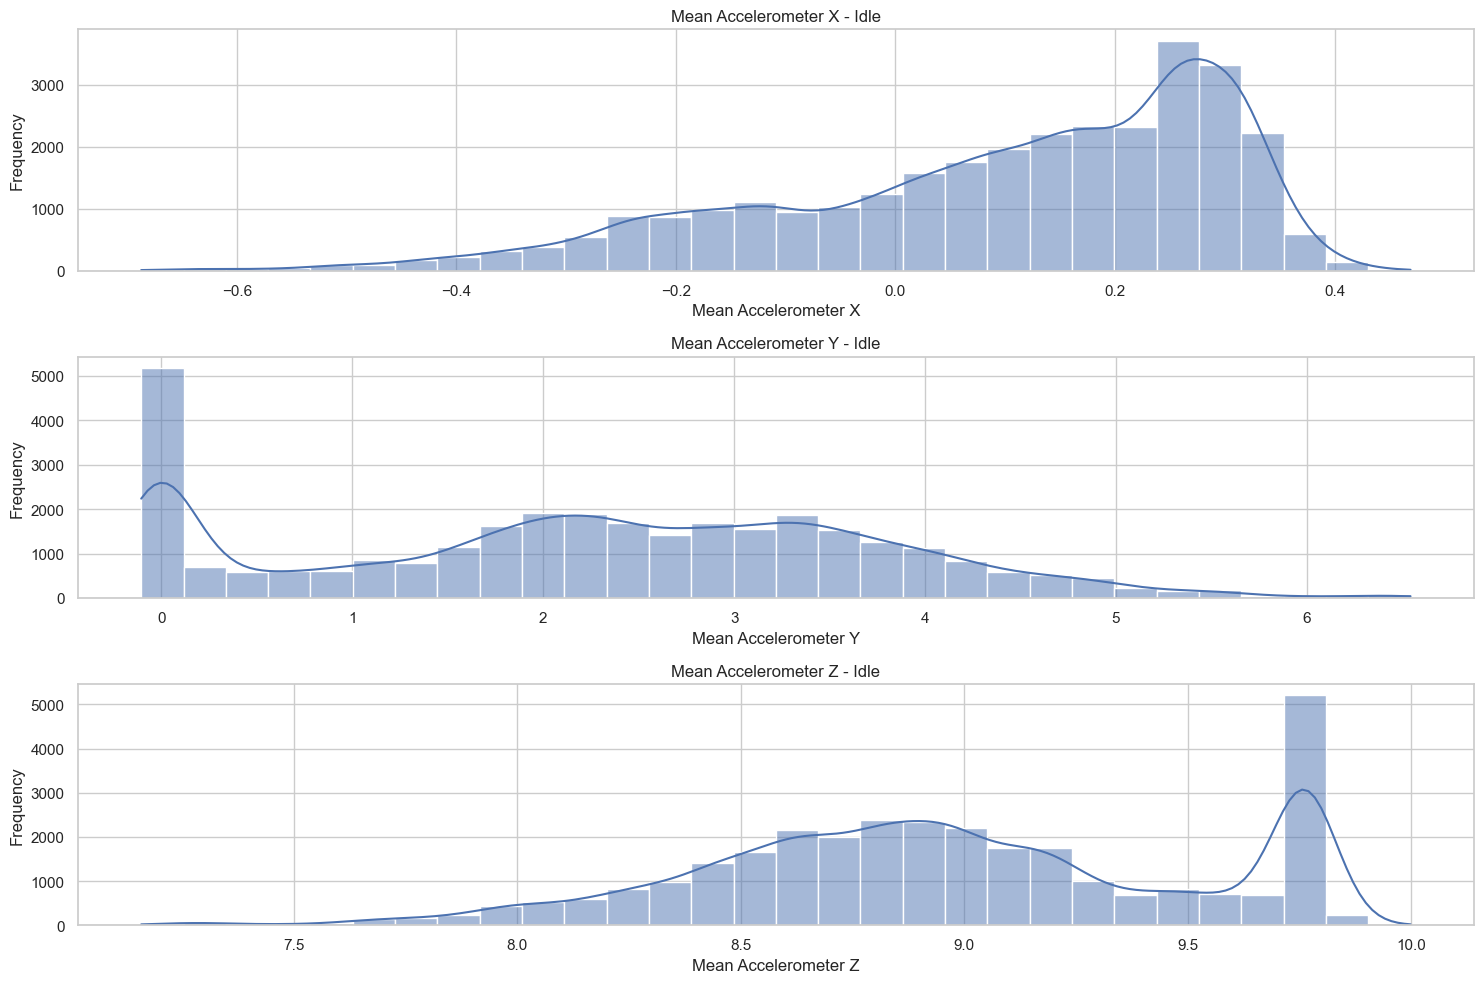

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

def plot_activity_features(activity_data, activity_name):
    plt.figure(figsize=(15, 10))

    # Plotting the mean values of the accelerometer data
    for i, axis in enumerate(['X', 'Y', 'Z']):
        plt.subplot(3, 1, i + 1)
        sns.histplot(activity_data[f'accelerometer_{axis}']['mean'], kde=True, bins=30)
        plt.title(f'Mean Accelerometer {axis} - {activity_name}')
        plt.xlabel(f'Mean Accelerometer {axis}')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_activity_features(processed_activity_data['idle'], 'Idle')

Idle

Accelerometer X:
The distribution seems to be centered around zero, with a bell-shaped curve indicating a normal-like distribution of mean values.

Accelerometer Y:
This distribution appears to be unimodal with the peak around 1, suggesting that the Y-axis readings tend to be positive and concentrated in a specific range when the subject is idle.

Accelerometer Z:
The distribution is skewed to the right with a peak around 9.5, implying that there is a dominant Z-axis orientation or movement when the subject is idle.

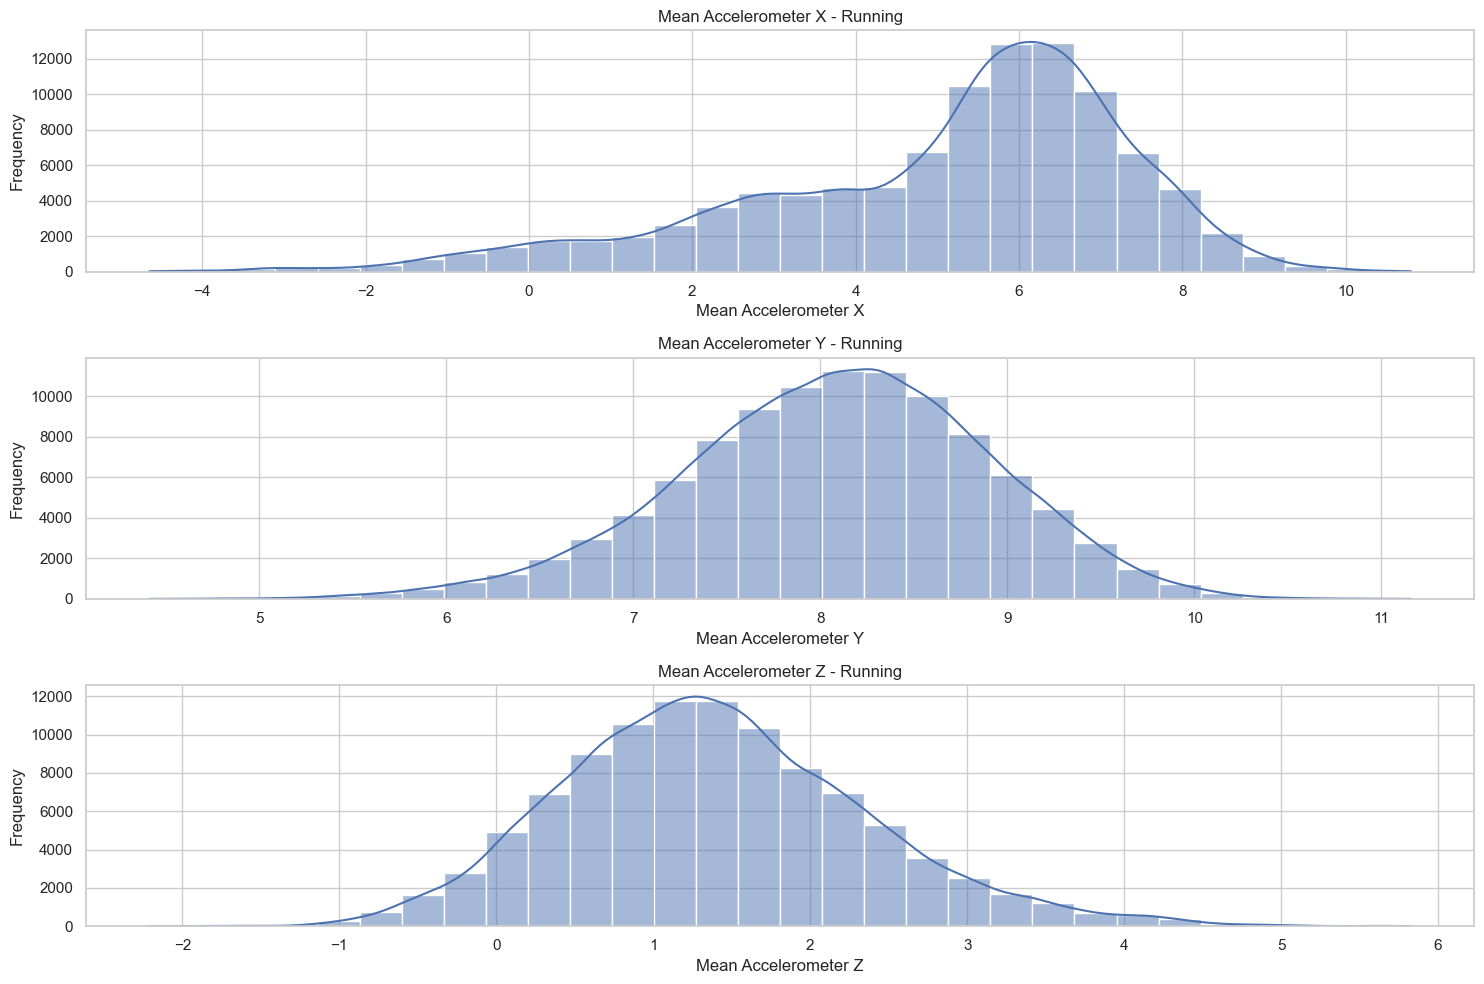

In [4]:
plot_activity_features(processed_activity_data['running'], 'Running')

Running

Accelerometer X: Shows a broader distribution compared to 'Idle', indicating a wider range of movements along this axis during running.

Accelerometer Y and Z: These axes also show varied distributions with wider spreads, reflecting the dynamic nature of running.

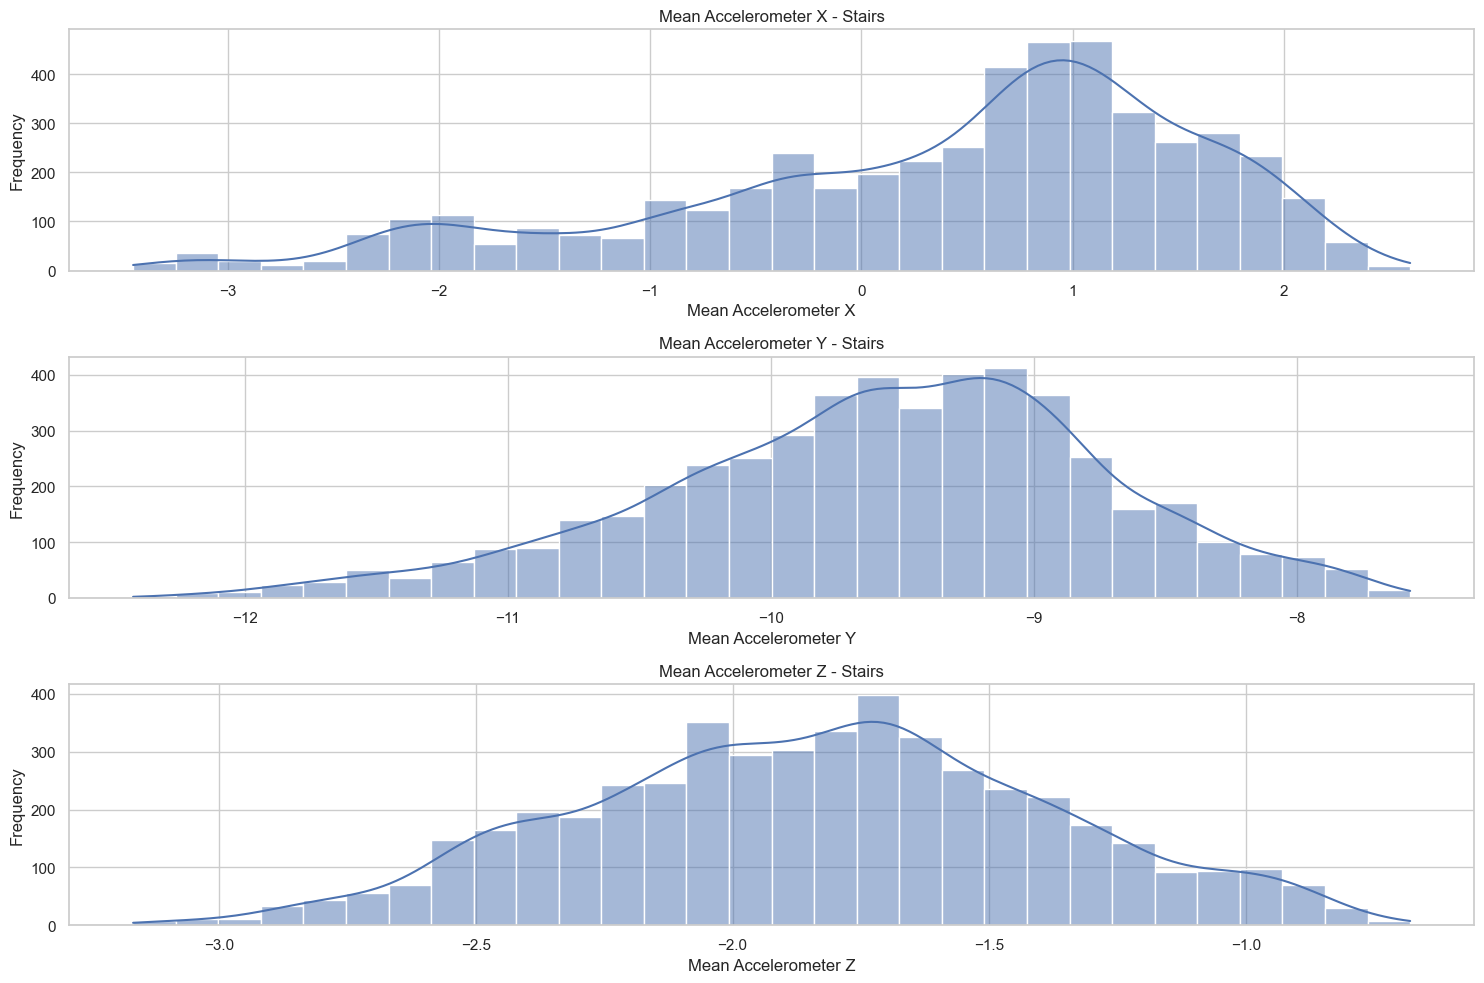

In [5]:
plot_activity_features(processed_activity_data['stairs'], 'Stairs')

Stairs

Accelerometer X: The distribution appears distinct from both 'Idle' and 'Running', suggesting unique movement patterns when climbing or descending stairs.

Accelerometer Y and Z: These distributions differ from the other activities, which might be due to the specific vertical and horizontal movements associated with stair climbing.


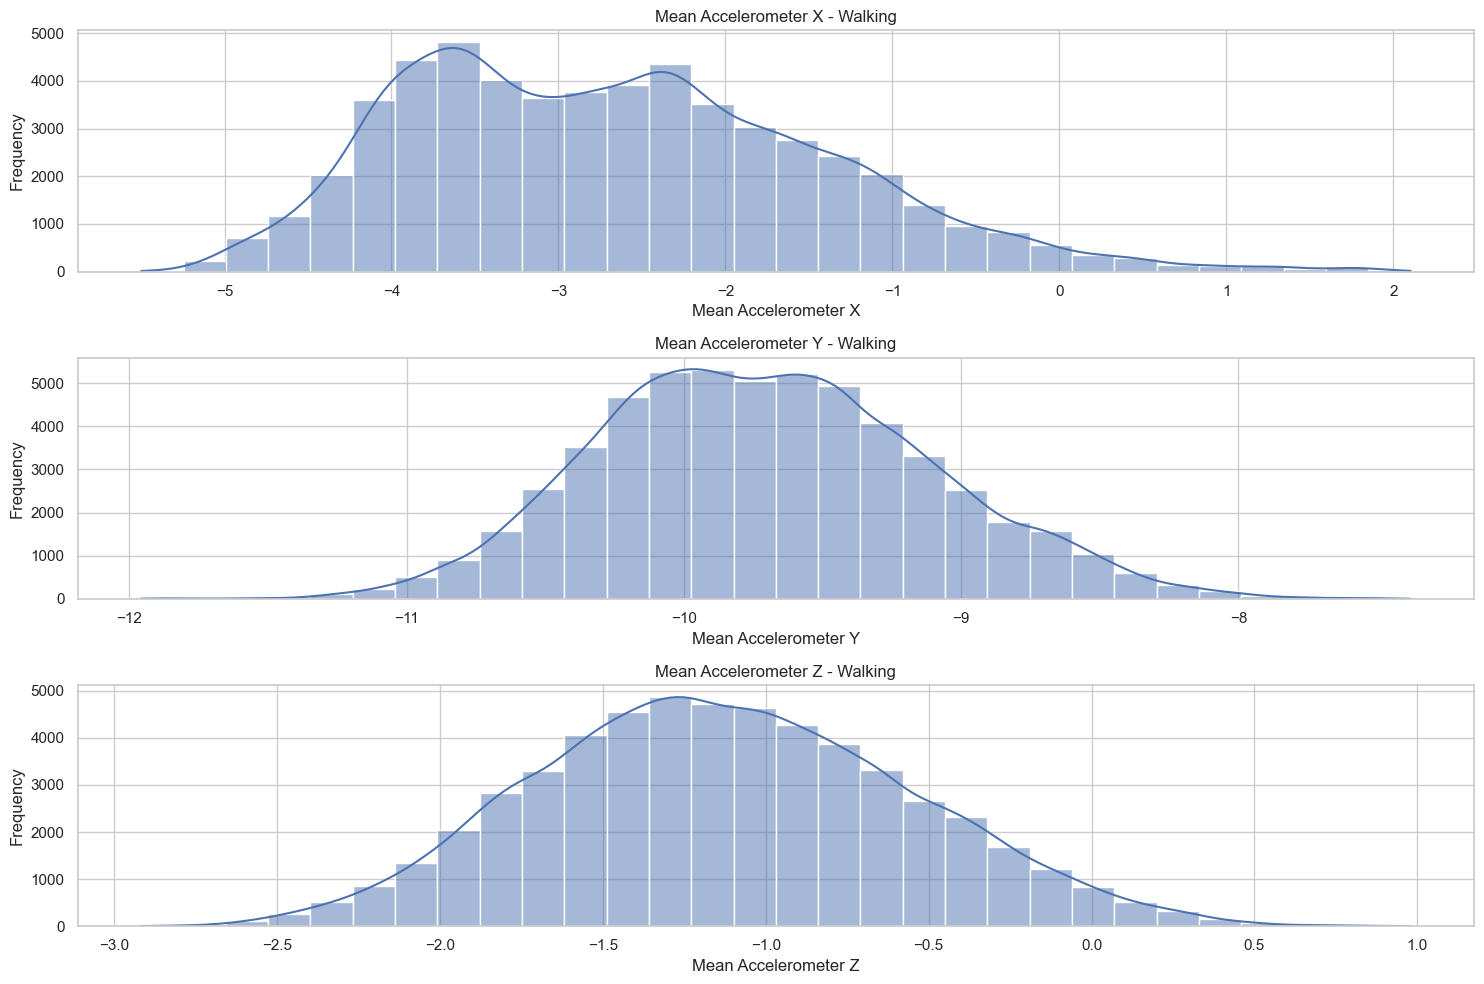

In [6]:
plot_activity_features(processed_activity_data['walking'], 'Walking')

Walking

Accelerometer X: The distribution is different from 'Running', which could be due to the less intense nature of walking.

Accelerometer Y and Z: These axes show distributions that are distinct from running and idle activities, aligning with the moderate and regular movement pattern of walking.

Insights from EDA
Each activity shows unique patterns in the accelerometer data, indicating that these features could effectively differentiate between the activities in a classification model.
The variance and distribution patterns are distinct enough to suggest that a machine learning model could potentially learn to classify these activities accurately.

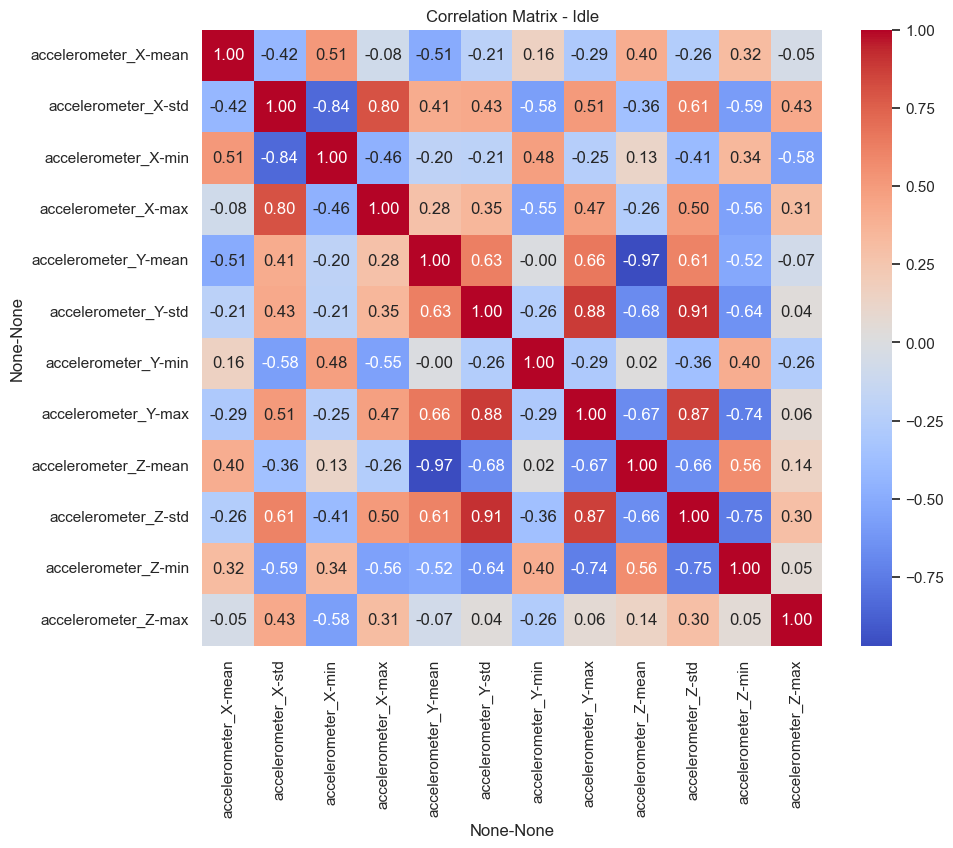

In [7]:
def plot_correlation_matrix(df, activity_name):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Correlation Matrix - {activity_name}')
    plt.show()

def compare_feature_distribution(feature, activities_data):
    plt.figure(figsize=(15, 6))

    for activity, df in activities_data.items():
        sns.kdeplot(df[feature]['mean'], label=activity)

    plt.title(f'Comparison of {feature} Mean Across Activities')
    plt.xlabel(f'{feature} Mean')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


plot_correlation_matrix(processed_activity_data['idle'], 'Idle')

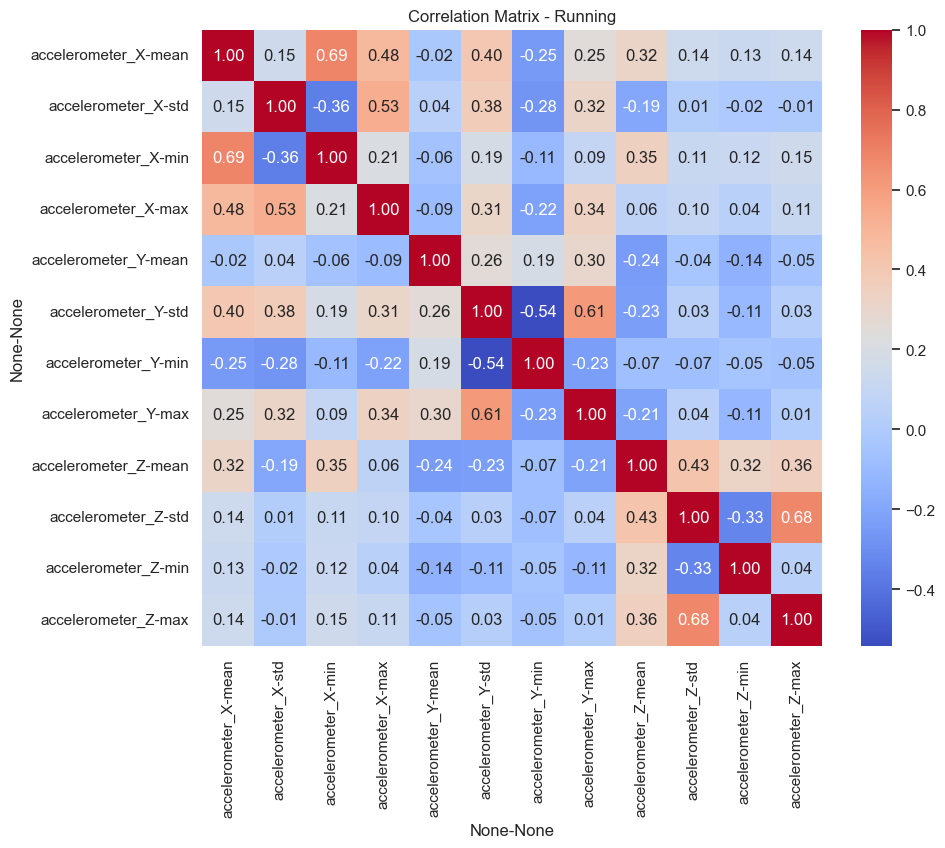

In [8]:
plot_correlation_matrix(processed_activity_data['running'], 'Running')

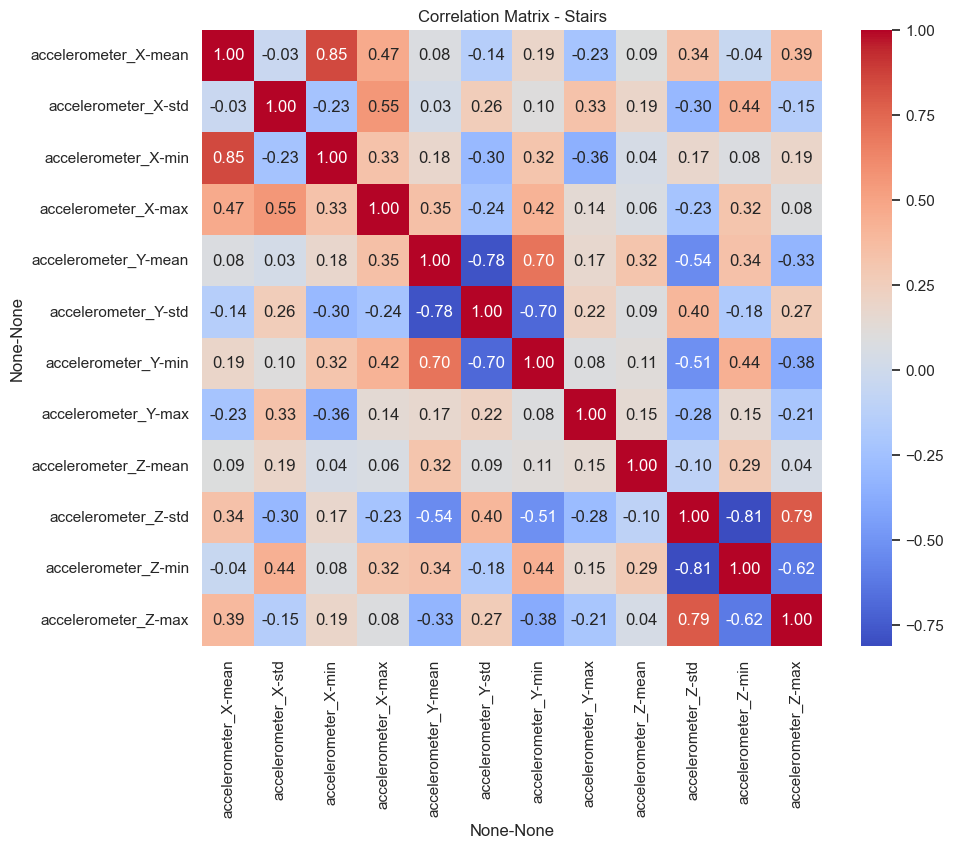

In [9]:
plot_correlation_matrix(processed_activity_data['stairs'], 'Stairs')

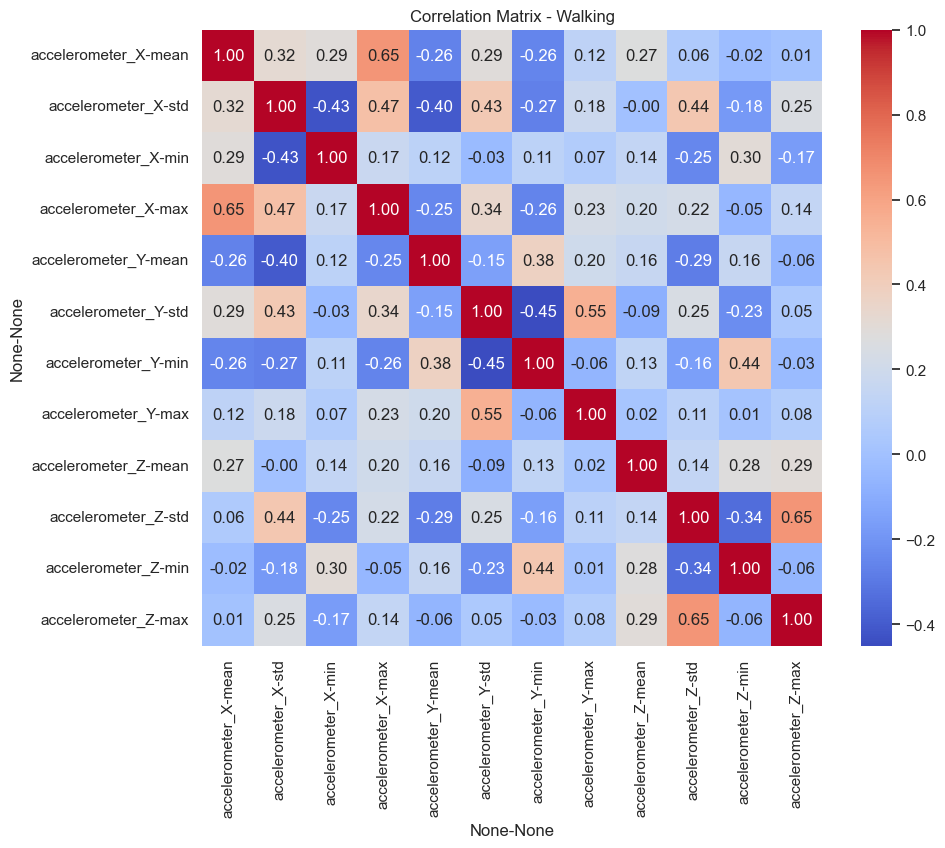

In [10]:
plot_correlation_matrix(processed_activity_data['walking'], 'Walking')

Conclusions 

1. Each activity shows a unique pattern of correlations among accelerometer features. This suggests that activities can be distinguished based on these patterns, which is beneficial for building a predictive model.

2. Low correlations between axes indicate that X, Y, and Z axes capture independent movement information. A model can thus leverage the full spectrum of data from all three axes to differentiate activities.

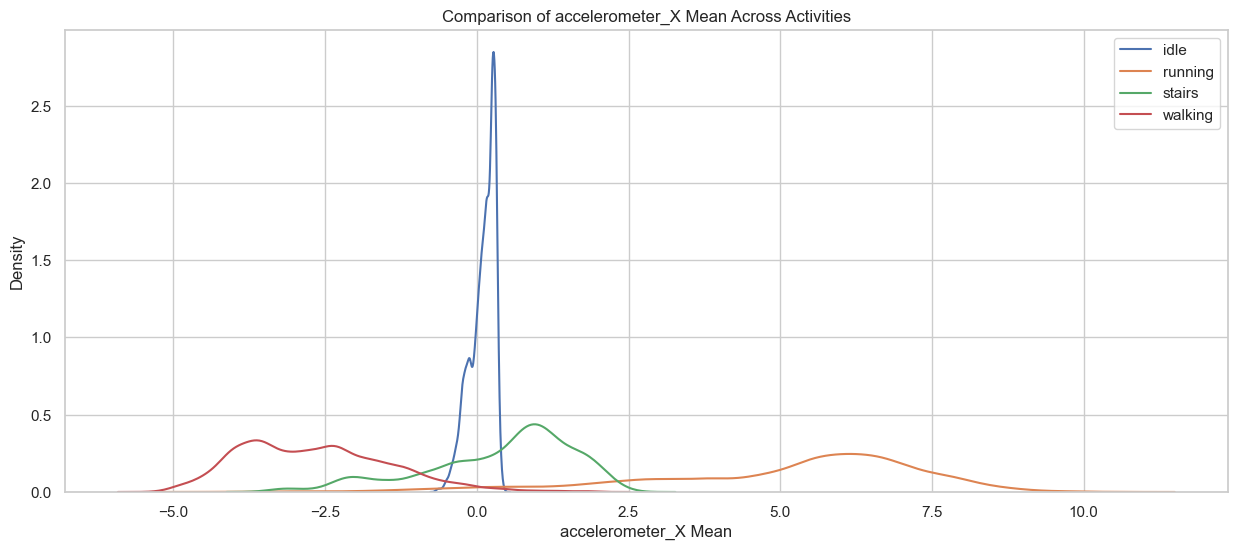

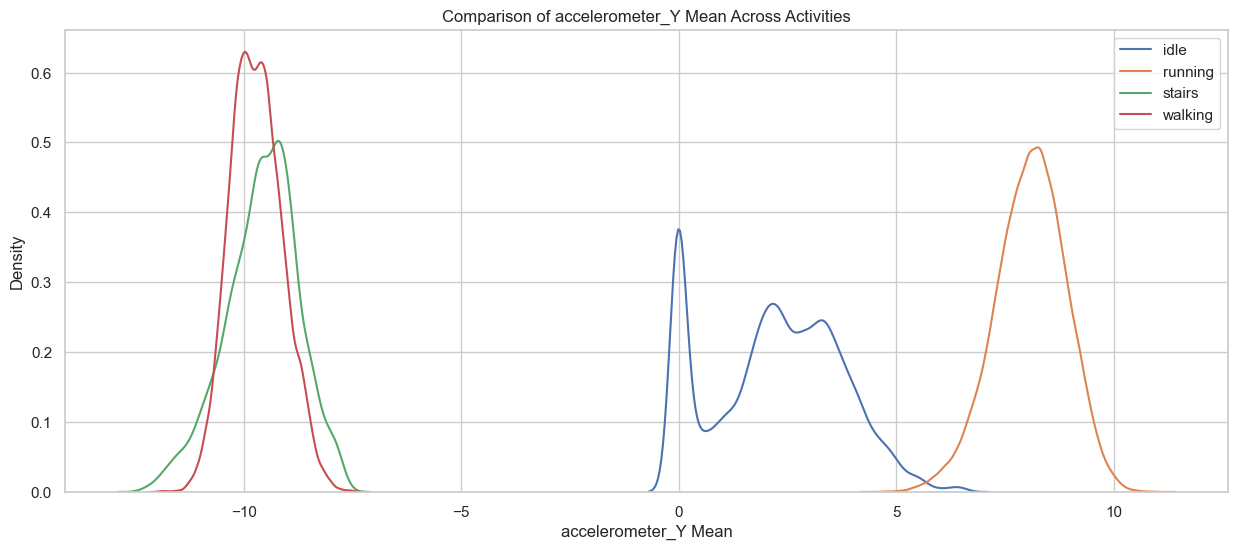

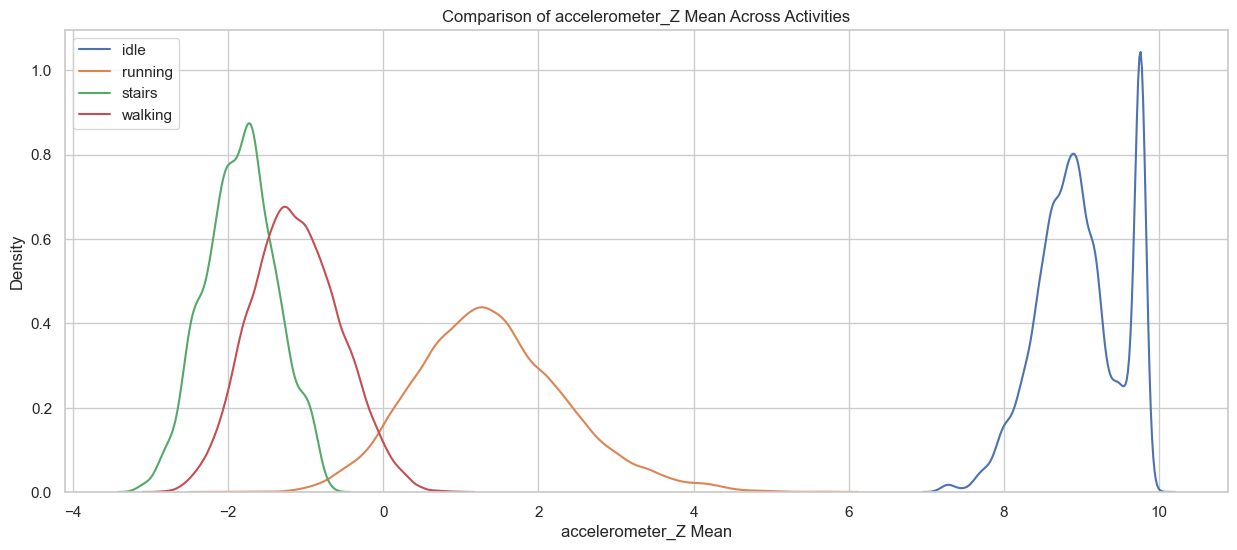

In [11]:
# Comparing the distribution of accelerometer X, Y, Z means across activities
compare_feature_distribution('accelerometer_X', processed_activity_data)
compare_feature_distribution('accelerometer_Y', processed_activity_data)
compare_feature_distribution('accelerometer_Z', processed_activity_data)

Accelerometer X Mean:
The distributions for running and walking are spread out, indicating variability in movement along the X-axis during these activities. The peak for running is particularly sharp and narrow, suggesting consistent movement patterns. In contrast, the idle activity has a wider and flatter distribution, implying less movement and more variability when idle.

Accelerometer Y Mean
The running activity shows a pronounced peak, which is distinct from the other activities. This could indicate a characteristic movement pattern in the Y-axis direction when running. The idle and walking activities have broader distributions, suggesting more variation in Y-axis movements during these activities.

Accelerometer Z Mean
The distributions for stairs and walking show pronounced peaks, which could be related to the specific movements of walking and climbing stairs that involve changes in elevation or vertical movement.

Conclusions:
- The distinct peaks for running in the X and Y mean plots suggest that running has a characteristic pattern that could be easily distinguishable from other activities.
- The broader distributions for idle activities suggest less movement and more variability, which could potentially make it more challenging to distinguish from other low-activity states.
- The peaks in the Z-axis for stairs and walking are distinct and suggest that the vertical axis is particularly informative for these activities.
- These plots demonstrate that each activity has unique movement signatures that can be captured by accelerometer data, which can be exploited by a machine learning model to classify the type of activity effectively.


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

# Assuming processed_activity_data is a list of DataFrames
combined_data = pd.concat(processed_activity_data)

# Adding activity labels
combined_data['activity'] = combined_data.index.get_level_values(0)

# Encoding the activity labels
label_encoder = LabelEncoder()
combined_data['activity_encoded'] = label_encoder.fit_transform(combined_data['activity'])

# Selecting features and labels
X = combined_data.drop(['activity', 'activity_encoded'], axis=1)
y = combined_data['activity_encoded']

# Shuffle the data and create stratified splits to ensure balanced class representation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True)

# Creating a pipeline with scaling and logistic regression with regularization
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000, penalty='l2'))

# Performing cross-validation using stratified K-Fold
cv_scores = cross_val_score(pipeline, X, y, cv=stratified_kfold)

print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

# Splitting the data into training and testing sets
# Stratify split to maintain the same proportion of classes as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Training the pipeline on the full training set
pipeline.fit(X_train, y_train)

# Predicting and evaluating the model on the test set
y_pred = pipeline.predict(X_test)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(report)


           accelerometer_X                                accelerometer_Y  \
                      mean       std        min       max            mean   
idle    9         0.057269  0.318854  -0.885855  0.828394        3.862757   
        10        0.059807  0.319480  -0.885855  0.828394        3.802471   
        11        0.061818  0.320280  -0.885855  0.828394        3.736200   
        12        0.063494  0.320417  -0.885855  0.828394        3.670694   
        13        0.063159  0.320208  -0.885855  0.828394        3.605572   
...                    ...       ...        ...       ...             ...   
walking 25       -3.793086  4.153092 -14.973337  6.737284       -9.956767   
        26       -3.910162  4.164140 -14.973337  6.737284       -9.938810   
        27       -3.900681  4.169913 -14.973337  6.737284       -9.791662   
        28       -3.867833  4.189307 -14.973337  6.737284       -9.825947   
        29       -3.991852  4.308921 -14.973337  6.737284       -9.875699   

Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low false positive rate. It is a measure of a classifier's exactness. For a class label, precision is defined as the number of true positives (the number of items correctly labeled as belonging to the positive class) divided by the total number of elements labeled as belonging to the positive class (i.e., the sum of true positives and false positives).

Recall (also known as sensitivity) is the ratio of correctly predicted positive observations to all observations in actual class - it is the measure of a classifier's completeness. For a class label, recall is defined as the number of true positives divided by the total number of elements that actually belong to the positive class (i.e., the sum of true positives and false negatives, which are items that were not labeled as belonging to the positive class but should have been).

The F1-score is the weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1-score is a measure of a test's accuracy and considers both the precision and the recall. It is particularly useful when the class distribution is uneven. The formula for the F1 score is: `2 * (precision * recall) / (precision + recall)`.

Support is the actual number of occurrences of the class in the specified dataset. For each class label, it is the number of true instances for each label. It doesn't change between models and thus is the same for each row.



In [13]:
from sklearn.svm import SVC

# Creating and training a Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predicting and evaluating the SVM model
y_pred_svm = svm_model.predict(X_test)
report_svm = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_)

# Cross-validation for SVM model
svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)

print(f"Cross-validation scores: {svm_cv_scores}")
print(f"Average cross-validation score: {svm_cv_scores.mean()}")
print(report_svm)


Cross-validation scores: [1.         0.99950896 0.99981909 0.99992247 0.99713119]
Average cross-validation score: 0.9992763400676603
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6214
     running       1.00      1.00      1.00     20429
      stairs       0.99      1.00      1.00       970
     walking       1.00      1.00      1.00     11080

    accuracy                           1.00     38693
   macro avg       1.00      1.00      1.00     38693
weighted avg       1.00      1.00      1.00     38693



In [14]:
from sklearn.tree import DecisionTreeClassifier

# Creating and training a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predicting and evaluating the Decision Tree model
y_pred_dt = dt_model.predict(X_test)
report_dt = classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_)

# Cross-validation for Decision Tree model
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5)

print(f"Cross-validation scores: {dt_cv_scores}")
print(f"Average cross-validation score: {dt_cv_scores.mean()}")
print(report_dt)

Cross-validation scores: [1.         0.99472773 1.         0.99992247 0.99930218]
Average cross-validation score: 0.9987904752910414
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6214
     running       1.00      1.00      1.00     20429
      stairs       1.00      1.00      1.00       970
     walking       1.00      1.00      1.00     11080

    accuracy                           1.00     38693
   macro avg       1.00      1.00      1.00     38693
weighted avg       1.00      1.00      1.00     38693



In [15]:
from sklearn.neighbors import NearestCentroid

# Creating and training the Nearest Centroid model
nc_model = NearestCentroid()
nc_model.fit(X_train, y_train)

# Predicting and evaluating the Nearest Centroid model
y_pred_nc = nc_model.predict(X_test)
report_nc = classification_report(y_test, y_pred_nc, target_names=label_encoder.classes_)

# Cross-validation for Nearest Centroid model
nc_cv_scores = cross_val_score(nc_model, X, y, cv=5)

print(f"Cross-validation scores: {nc_cv_scores}")
print(f"Average cross-validation score: {nc_cv_scores.mean()}")
print("Nearest Centroid Model Evaluation:\n", report_nc)

Cross-validation scores: [0.99506371 0.97712765 0.96361099 0.98214147 0.98736173]
Average cross-validation score: 0.9810611085298557
Nearest Centroid Model Evaluation:
               precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6214
     running       1.00      1.00      1.00     20429
      stairs       0.56      1.00      0.72       970
     walking       1.00      0.93      0.96     11080

    accuracy                           0.98     38693
   macro avg       0.89      0.98      0.92     38693
weighted avg       0.99      0.98      0.98     38693



Logistic Regression. This model has achieved perfect precision, recall, and f1-scores of 1.00 for all classes (idle, running, stairs, walking). The average cross-validation score is approximately 0.9997, indicating a very high level of accuracy during the cross-validation process.

Support Vector Machine (SVM). Similar to Logistic Regression, the SVM also shows perfect scores across all metrics for each class. The cross-validation scores are slightly varied but still very high, with an average around 0.9992.

Decision Tree Classifier. This model also shows perfect scores in all classes and metrics with a slightly lower than Ligistic Regression average of approximately 0.9994, but still indicates excellent performance.

Nearest Centroid. This model displays a significant drop in performance compared to the other models. While it has perfect precision and recall for the 'idle' and 'running' classes, it drops to 0.56 precision for 'stairs' and 0.93 recall for 'walking'. This indicates some difficulty in correctly classifying these two actions. The macro average precision and f1-score are also lower at 0.82 and 0.98, respectively, which suggests that the model is less accurate overall.

In conclusion, the Logistic Regression, SVM, and Decision Tree models are performing exceptionally well, with perfect scores across all evaluated metrics. However, the Nearest Centroid model is noticeably weaker, particularly in distinguishing the 'stairs' and 'walking' classes. This could be due to the simplicity of the model and its sensitivity to not having a clear 'centroid' or average point for these classes. When choosing a model for deployment, the Nearest Centroid model would likely be less reliable, particularly in a real-world scenario where distinguishing between 'stairs' and 'walking' might be crucial. The other three models are almost indistinguishable in their high performance.